# **Modelos con Pipelines**

In [1]:
import pandas as pd

In [2]:
fraude_train = pd.read_csv("fraude_train.csv") 

## **KNN**

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# === Crear pipeline con el mejor k encontrado (k=9) ===
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=9))
])


In [4]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Separar variables
X = fraude_train.drop(columns=['isfraud'])
y = fraude_train['isfraud']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Balanceo SOLO en entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)


In [5]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time

# === Entrenar pipeline ===
start_time = time.time()
pipe_knn.fit(X_train_bal, y_train_bal)

# Predecir sobre test (sin balancear)
y_pred = pipe_knn.predict(X_test)
y_proba = pipe_knn.predict_proba(X_test)
end_time = time.time()

print(f"Tiempo de cómputo (pipeline KNN): {end_time - start_time:.2f} segundos")

# === Reporte y métricas ===
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Tiempo de cómputo (pipeline KNN): 15.27 segundos

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93     39871
         1.0       0.36      0.72      0.48      3395

    accuracy                           0.88     43266
   macro avg       0.66      0.81      0.70     43266
weighted avg       0.93      0.88      0.89     43266



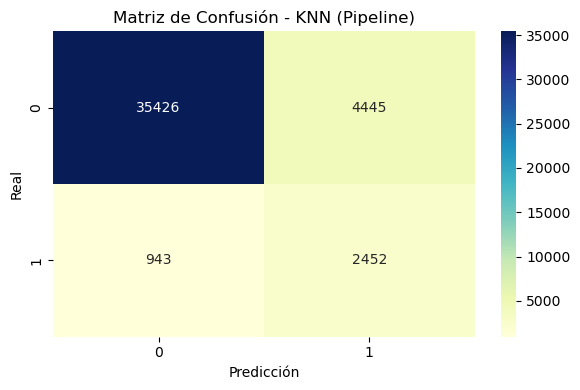

In [6]:

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matriz de Confusión - KNN (Pipeline)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


AUC final sobre test: 0.8671


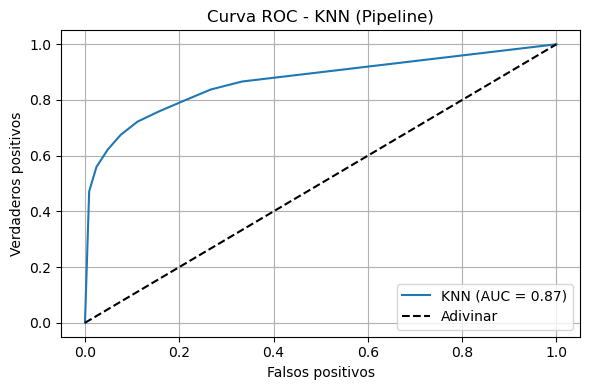

In [7]:

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
auc_score = roc_auc_score(y_test, y_proba[:, 1])
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - KNN (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **Bayes**

In [8]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Separar variables
X = fraude_train.drop(columns=['isfraud'])
y = fraude_train['isfraud']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Balanceo SOLO en entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)


In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Pipeline directo (sin escalado)
pipe_nb = Pipeline([
    ('bayes', GaussianNB())
])

# Entrenamiento y predicción
start_time = time.time()
pipe_nb.fit(X_train_bal, y_train_bal)
y_pred = pipe_nb.predict(X_test)
y_proba = pipe_nb.predict_proba(X_test)[:, 1]
end_time = time.time()

print(f"Tiempo de cómputo (pipeline Naive Bayes): {end_time - start_time:.2f} segundos")

# Reporte
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Tiempo de cómputo (pipeline Naive Bayes): 0.27 segundos

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.10      0.18     39871
         1.0       0.08      0.96      0.15      3395

    accuracy                           0.17     43266
   macro avg       0.52      0.53      0.17     43266
weighted avg       0.90      0.17      0.18     43266



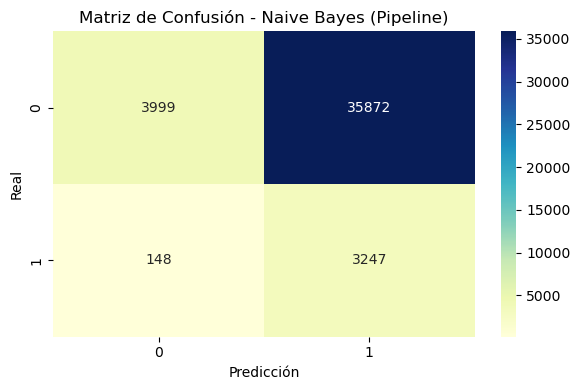

In [10]:
# matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matriz de Confusión - Naive Bayes (Pipeline)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


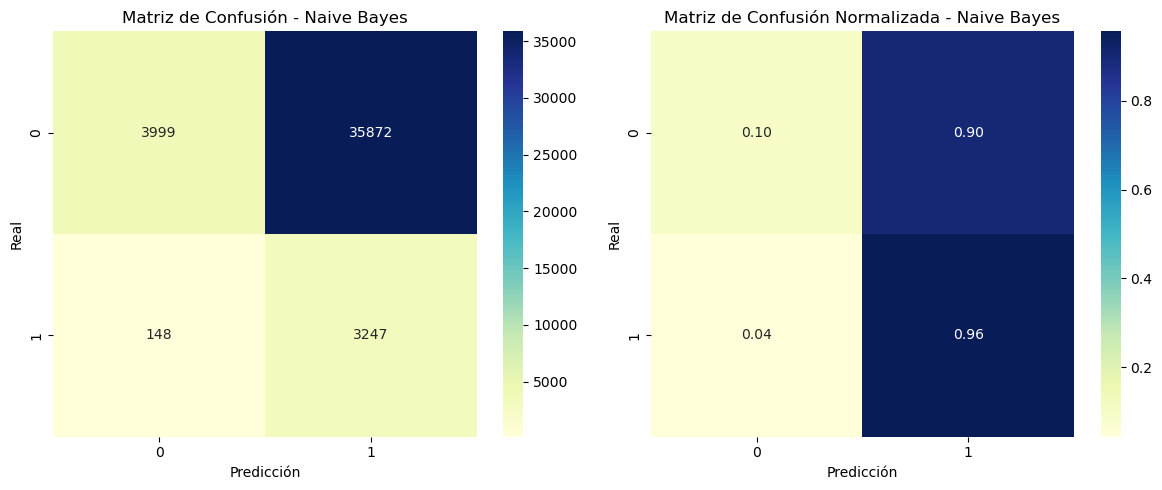

In [11]:
# Matrices de confusión
cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

# Crear figura con 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz cruda
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Matriz de Confusión - Naive Bayes")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Matriz normalizada
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Matriz de Confusión Normalizada - Naive Bayes")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


AUC final sobre test: 0.6176


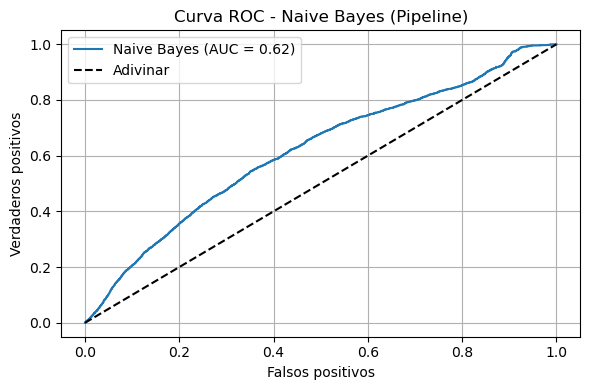

In [12]:
#curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - Naive Bayes (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **Ridge**

In [13]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Separar variables
X = fraude_train.drop(columns=['isfraud'])
y = fraude_train['isfraud']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Balanceo SOLO en entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)


In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time

# === Pipeline sin fijar C ===
pipe_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', LogisticRegression(
        penalty='l2',
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ))
])

# === Grilla y validación cruzada ===
param_grid = {'ridge__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, response_method="predict_proba")

# === GridSearchCV con pipeline ===
grid_search_ridge = GridSearchCV(
    estimator=pipe_ridge,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# === Medir tiempo completo (búsqueda + entrenamiento) ===
start_time = time.time()
grid_search_ridge.fit(X_train_bal, y_train_bal)
end_time = time.time()

print(f"Tiempo total de entrenamiento y búsqueda (pipeline Ridge): {end_time - start_time:.2f} segundos")

# === Predicción y métricas ===
best_ridge = grid_search_ridge.best_estimator_
y_pred = best_ridge.predict(X_test)
y_proba = best_ridge.decision_function(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tiempo total de entrenamiento y búsqueda (pipeline Ridge): 45.69 segundos

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     39871
         1.0       0.26      0.67      0.38      3395

    accuracy                           0.83     43266
   macro avg       0.61      0.75      0.64     43266
weighted avg       0.91      0.83      0.86     43266



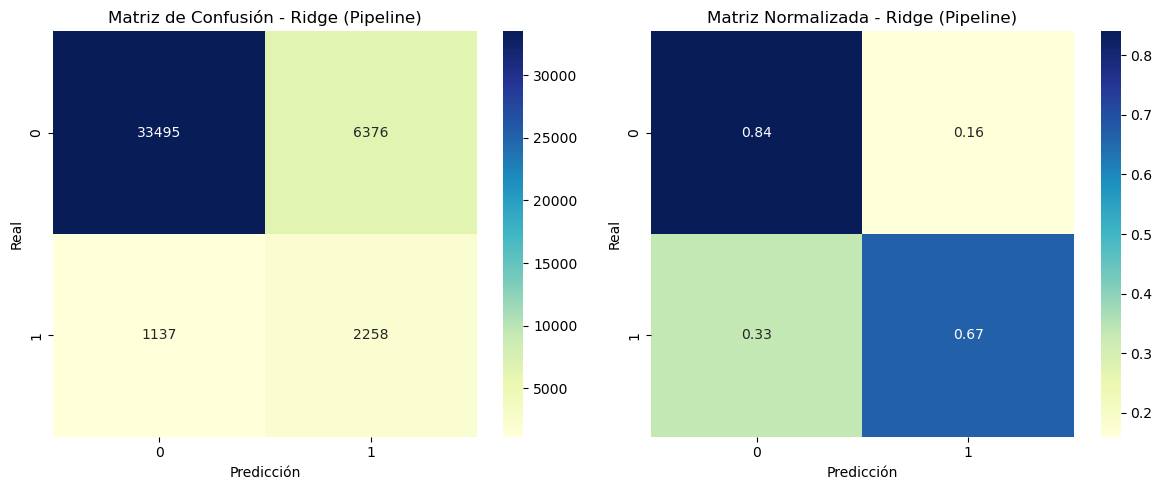

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matrices
cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

# Figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz cruda
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Matriz de Confusión - Ridge (Pipeline)")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Matriz normalizada
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Matriz Normalizada - Ridge (Pipeline)")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


AUC final sobre test: 0.8321


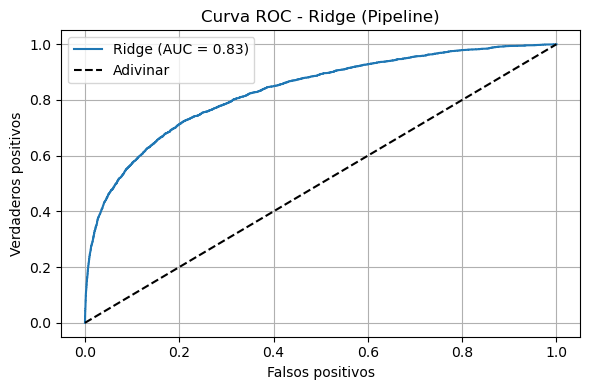

In [16]:
# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Ridge (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - Ridge (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **Lasso**

In [17]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

# Separar variables
X = fraude_train.drop(columns=['isfraud'])
y = fraude_train['isfraud']

# División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Balanceo SOLO en entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, classification_report
import time

# === Pipeline: escalado + Lasso ===
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegression(
        penalty='l1',
        solver='liblinear',
        max_iter=1000,
        random_state=42
    ))
])

# === Grid y validación cruzada ===
param_grid = {'lasso__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, response_method='predict_proba')

# === GridSearchCV con pipeline ===
grid_search_lasso = GridSearchCV(
    estimator=pipe_lasso,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# === Entrenamiento completo con tiempo total ===
start_time = time.time()
grid_search_lasso.fit(X_train_bal, y_train_bal)
end_time = time.time()

print(f"Tiempo total de entrenamiento y búsqueda (pipeline Lasso): {end_time - start_time:.2f} segundos")

# === Predicción y reporte ===
best_lasso = grid_search_lasso.best_estimator_
y_pred = best_lasso.predict(X_test)
y_proba = best_lasso.predict_proba(X_test)[:, 1]

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tiempo total de entrenamiento y búsqueda (pipeline Lasso): 123.86 segundos

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     39871
         1.0       0.26      0.67      0.38      3395

    accuracy                           0.83     43266
   macro avg       0.61      0.75      0.64     43266
weighted avg       0.91      0.83      0.86     43266



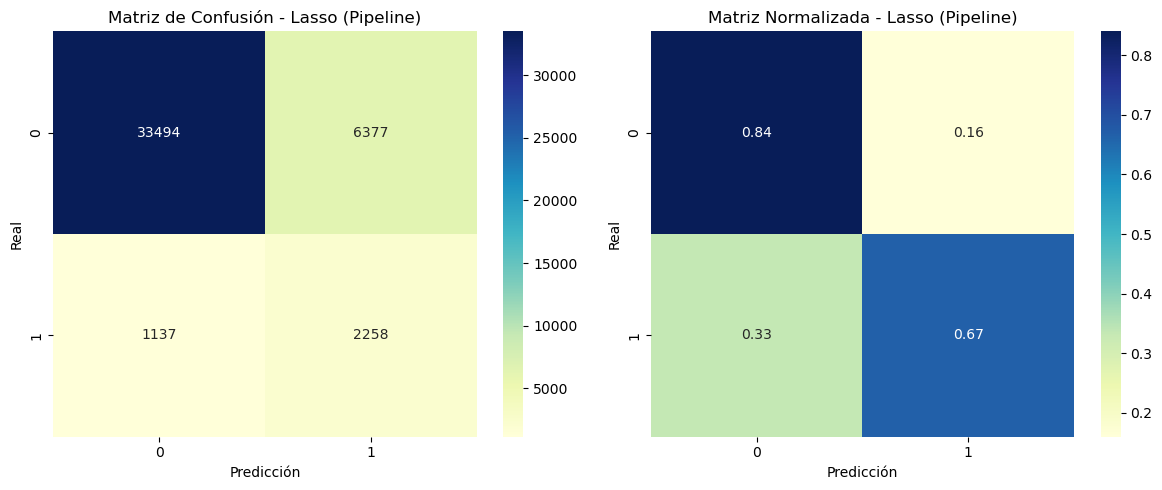

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Matrices
cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

# Figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz cruda
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Matriz de Confusión - Lasso (Pipeline)")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Matriz normalizada
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Matriz Normalizada - Lasso (Pipeline)")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


AUC final sobre test: 0.8321


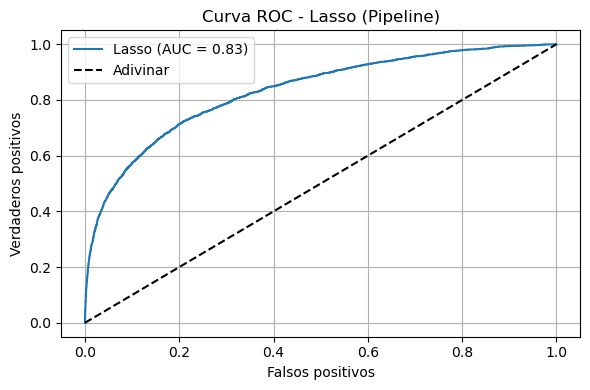

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Curva ROC y AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Lasso (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - Lasso (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **Random Forest**

In [22]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# === Cargar datos ===
df = pd.read_csv("fraude_train.csv")

# === Separar variables
X = df.drop(columns=["isfraud"])
y = df["isfraud"]

# === División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Balancear solo el conjunto de entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)
print("Distribución post-balanceo:", Counter(y_train_bal))


Distribución post-balanceo: Counter({0.0: 89700, 1.0: 89700})


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
import joblib
import time
import multiprocessing

# === Definir pipeline sin escalado ===
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# === Grilla de hiperparámetros ===
param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
    'rf__max_features': ['sqrt', 'log2']
}

# === Validación cruzada y métrica AUC ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, needs_proba=True)

# === Configurar búsqueda de hiperparámetros ===
grid_search_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# === Entrenamiento con medición de tiempo ===
print("Núcleos disponibles:", multiprocessing.cpu_count())
start = time.time()

with joblib.parallel_backend('loky'):
    grid_search_rf.fit(X_train_bal, y_train_bal)

end = time.time()
elapsed_time = end - start
print(f"\nTiempo total de entrenamiento y búsqueda (pipeline RF): {elapsed_time:.2f} segundos")

# === Resultados de la búsqueda ===
print("Mejores hiperparámetros:", grid_search_rf.best_params_)
print("Mejor AUC promedio en validación cruzada:", grid_search_rf.best_score_)


Núcleos disponibles: 16
Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



Tiempo total de entrenamiento y búsqueda (pipeline RF): 1516.32 segundos
Mejores hiperparámetros: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Mejor AUC promedio en validación cruzada: 0.9952589052570875


In [ ]:
# === Mostrar resultados guardados ===
with open("resultados_rf.txt", "r", encoding="utf-8") as f:
    print(f.read())


In [24]:
import joblib
from sklearn.metrics import classification_report

# === Cargar modelo entrenado ===
best_rf_model = grid_search_rf.best_estimator_

# === Usar los mismos datos originales ya divididos ===
# (asumiendo que ya tienes X_train, X_test, y_train, y_test cargados)

# === Predecir y evaluar ===
y_pred = best_rf_model.predict(X_test)
y_proba = best_rf_model.predict_proba(X_test)[:, 1]

# === Reporte de clasificación ===
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     39871
         1.0       0.84      0.56      0.67      3395

    accuracy                           0.96     43266
   macro avg       0.90      0.78      0.83     43266
weighted avg       0.95      0.96      0.95     43266



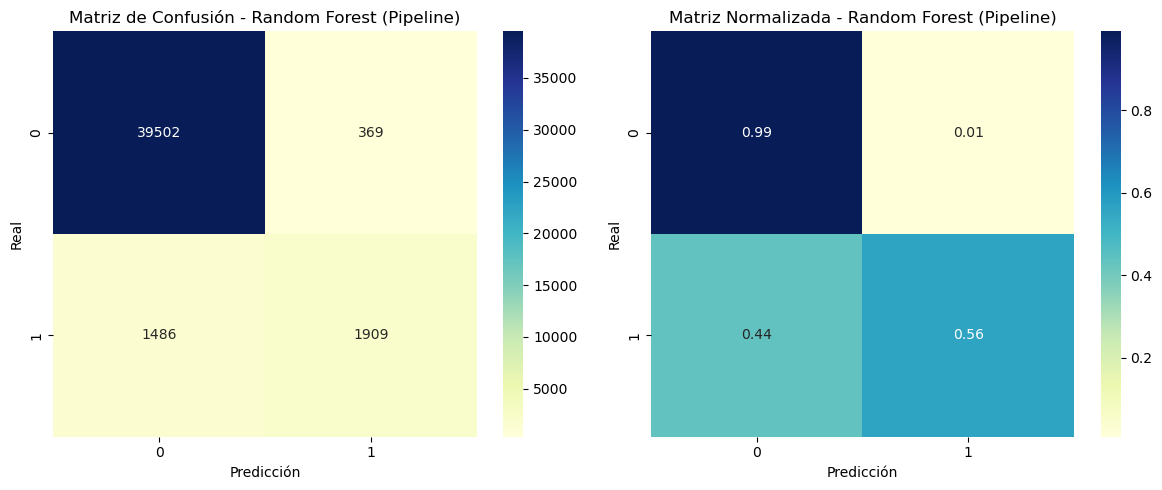

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Matriz de Confusión - Random Forest (Pipeline)")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Matriz Normalizada - Random Forest (Pipeline)")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


AUC final sobre test: 0.9329


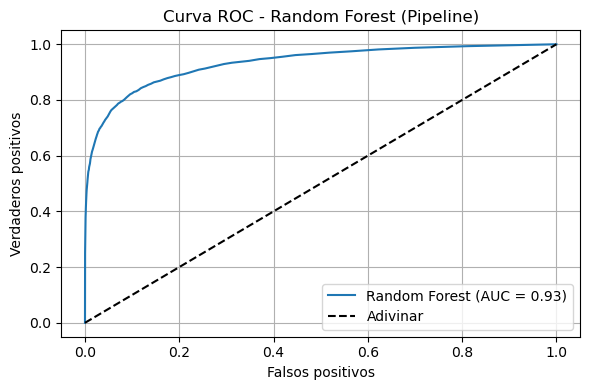

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - Random Forest (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **XGBOOST**

In [27]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# === Cargar datos ===
df = pd.read_csv("fraude_train.csv")

# === Separar variables
X = df.drop(columns=["isfraud"])
y = df["isfraud"]

# === División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Balanceo solo en entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)
print("Distribución post-balanceo:", Counter(y_train_bal))


Distribución post-balanceo: Counter({0.0: 89700, 1.0: 89700})


In [28]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
import joblib
import time
import multiprocessing

# === Pipeline con solo XGBoost ===
pipe_xgb = Pipeline([
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss', n_jobs=-1))
])

# === Espacio de búsqueda ===
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1]
}

# === Validación cruzada y métrica ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, needs_proba=True)

# === GridSearchCV con paralelización ===
grid_search_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# === Entrenamiento con tiempo ===
print("Núcleos disponibles:", multiprocessing.cpu_count())
start = time.time()

with joblib.parallel_backend('loky'):
    grid_search_xgb.fit(X_train_bal, y_train_bal)

end = time.time()
elapsed_time = end - start
print(f"\nTiempo total de entrenamiento y búsqueda (pipeline XGBoost): {elapsed_time:.2f} segundos")

# === Mostrar resultados ===
print("Mejores hiperparámetros:", grid_search_xgb.best_params_)
print("Mejor AUC promedio en validación cruzada:", grid_search_xgb.best_score_)


Núcleos disponibles: 16
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(



Tiempo total de entrenamiento y búsqueda (pipeline XGBoost): 491.73 segundos
Mejores hiperparámetros: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 7, 'xgb__n_estimators': 300, 'xgb__subsample': 0.8}
Mejor AUC promedio en validación cruzada: 0.9969075296199769


In [29]:
from sklearn.metrics import classification_report

# === Cargar modelo entrenado ===
best_xgb_model = grid_search_xgb.best_estimator_

# === Predecir y evaluar ===
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# === Reporte de clasificación ===
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     39871
         1.0       0.88      0.66      0.76      3395

    accuracy                           0.97     43266
   macro avg       0.93      0.83      0.87     43266
weighted avg       0.96      0.97      0.96     43266



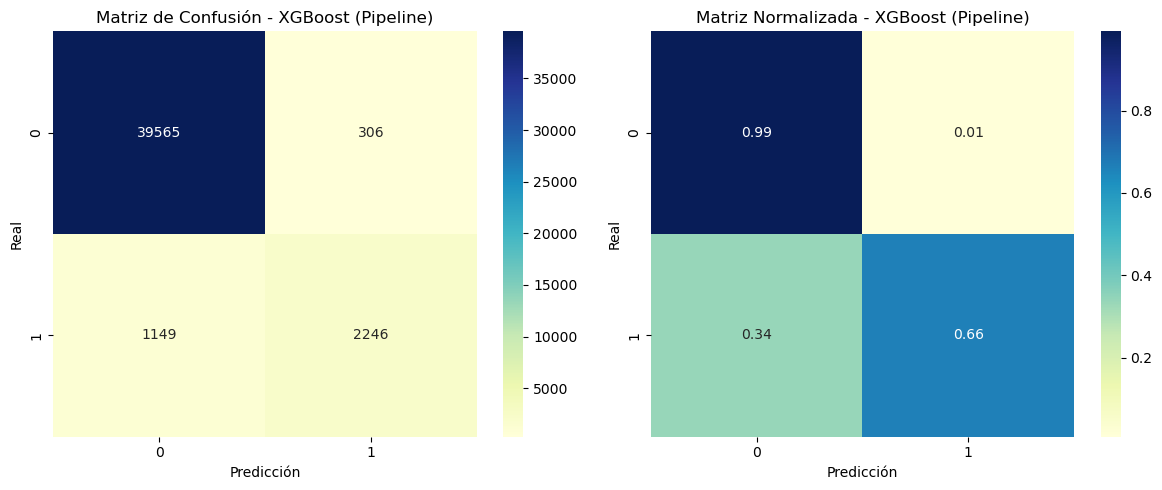

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Matriz de Confusión - XGBoost (Pipeline)")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Matriz Normalizada - XGBoost (Pipeline)")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


AUC final sobre test: 0.9620


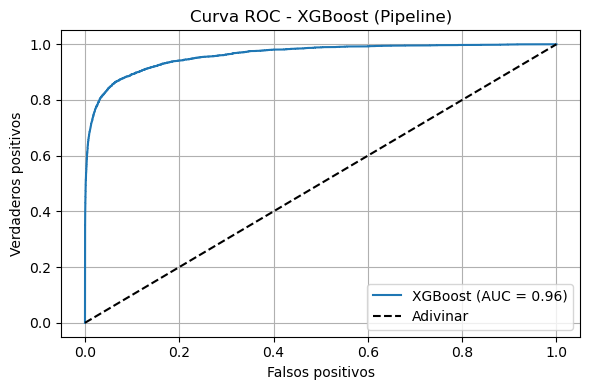

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - XGBoost (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### **Implementación de LIME**

In [36]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    class_names=['No Fraude', 'Fraude'],
    mode='classification',
    discretize_continuous=True
)

i = 7  # índice de la observación a explicar

exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=best_xgb_model.predict_proba
)

# Mostrar como texto
exp.show_in_notebook(show_table=True)

# mostrar en consola
print(exp.as_list())

[('num__c14 <= 1.00', 0.06301532924501327), ('num__c3 <= 0.00', 0.037888056126250236), ('num__transactiondt <= 1887366.75', -0.01652558246250584), ('num__v224 <= 0.00', 0.01639583802505436), ('num__card2 > 545.00', -0.01508501064961906), ('num__v124 <= 1.00', -0.012355712656429626), ('num__v146 <= 0.00', -0.009339410868240194), ('num__v282 <= 1.00', 0.00840936370085003), ('num__id_20 <= 266.00', -0.00838312480963984), ('num__v289 <= 0.00', 0.00821176091266259)]


In [34]:
y_test.iloc[i]  # donde i es el mismo en LIME


0.0

In [37]:
# Buscar el índice de una fila que sea fraude en el test
fraude_idx = y_test[y_test == 1].index[0]

# Explicar ese caso con LIME
exp = explainer.explain_instance(
    data_row=X_test.loc[fraude_idx],
    predict_fn=best_xgb_model.predict_proba
)
exp.show_in_notebook(show_table=True)


## **SVM (Máquina de soporte vectorial)**

Para armar este pipeline se usará la versión del modelo hecha con `LinearSVC `

In [38]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# === Cargar datos ===
df = pd.read_csv("fraude_train.csv")

# === Separar variables
X = df.drop(columns=["isfraud"])
y = df["isfraud"]

# === División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Balanceo solo en entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)
print("Distribución post-balanceo:", Counter(y_train_bal))


Distribución post-balanceo: Counter({0.0: 89700, 1.0: 89700})


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
import joblib
import time

# === Pipeline: escalado + modelo calibrado ===
base_svm = LinearSVC(max_iter=10000, random_state=42)
calibrated_svm = CalibratedClassifierCV(estimator=base_svm, cv=3)

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', calibrated_svm)
])

# === Grilla de hiperparámetros ===
param_grid = {
    'svm__estimator__C': [0.01, 0.1, 1, 10, 100]
}

# === Validación cruzada y métrica AUC ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, needs_proba=True)

# === GridSearchCV ===
grid_search_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# === Entrenamiento con tiempo ===
start = time.time()
with joblib.parallel_backend('loky'):
    grid_search_svm.fit(X_train_bal, y_train_bal)
end = time.time()

print(f"\nTiempo total entrenamiento y búsqueda (SVM optimizado): {end - start:.2f} segundos")
print("Mejor C:", grid_search_svm.best_params_['svm__estimator__C'])
print("Mejor AUC promedio:", grid_search_svm.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Tiempo total entrenamiento y búsqueda (SVM optimizado): 61.05 segundos
Mejor C: 100
Mejor AUC promedio: 0.8741693785428699


In [40]:
from sklearn.metrics import classification_report

# === Mejor modelo ===
best_svm = grid_search_svm.best_estimator_

# === Predicciones ===
y_pred = best_svm.predict(X_test)
y_proba = best_svm.predict_proba(X_test)[:, 1]

# === Reporte de clasificación ===
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90     39871
         1.0       0.26      0.67      0.37      3395

    accuracy                           0.82     43266
   macro avg       0.61      0.75      0.63     43266
weighted avg       0.91      0.82      0.85     43266



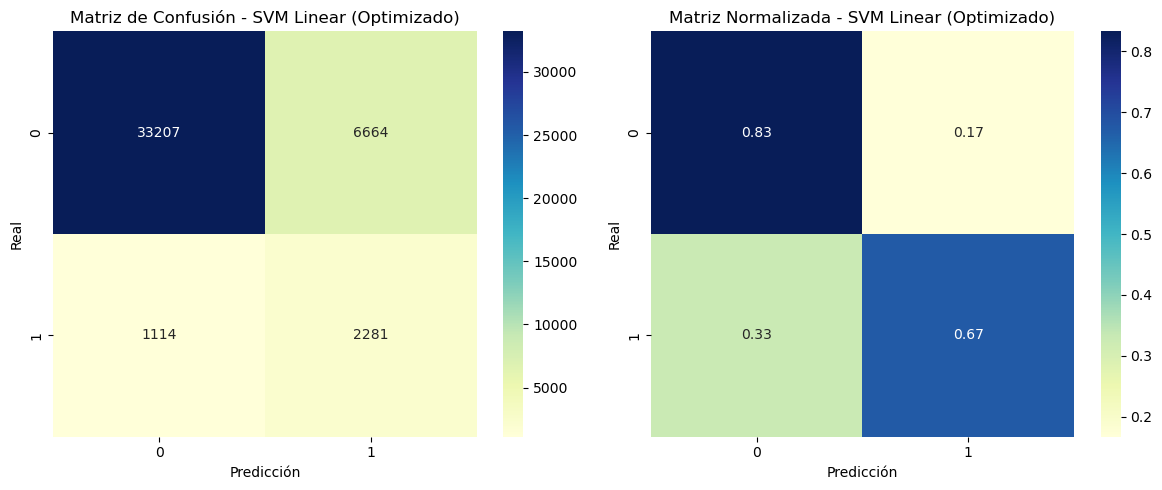

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Matriz de Confusión - SVM Linear (Optimizado)")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Matriz Normalizada - SVM Linear (Optimizado)")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


AUC final sobre test: 0.8319


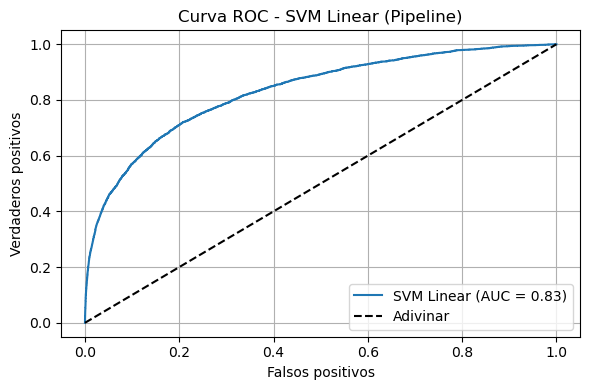

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'SVM Linear (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - SVM Linear (Pipeline)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


## **SVM (Máquina de soporte vectorial)**

Se utilizará la versión optimizada con `SGDClassifier`

In [43]:
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from collections import Counter
import pandas as pd

# === Cargar datos ===
df = pd.read_csv("fraude_train.csv")

# === Separar variables
X = df.drop(columns=["isfraud"])
y = df["isfraud"]

# === División estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# === Balanceo SOLO sobre entrenamiento
smote_tomek = SMOTETomek(random_state=42)
X_train_bal, y_train_bal = smote_tomek.fit_resample(X_train, y_train)
print("Distribución post-balanceo:", Counter(y_train_bal))


Distribución post-balanceo: Counter({0.0: 89700, 1.0: 89700})


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
import joblib
import time

# === Pipeline con escalado y calibración ===
sgd_base = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
sgd_calibrado = CalibratedClassifierCV(estimator=sgd_base, cv=3)

pipe_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', sgd_calibrado)
])

# === Grid de hiperparámetros ===
param_grid = {
    'sgd__estimator__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
}

# === Validación cruzada y métrica ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, needs_proba=True)

# === GridSearchCV ===
grid_search_sgd = GridSearchCV(
    estimator=pipe_sgd,
    param_grid=param_grid,
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# === Entrenamiento con tiempo total ===
start_time = time.time()
grid_search_sgd.fit(X_train_bal, y_train_bal)
end_time = time.time()

print(f"\nTiempo total entrenamiento y búsqueda (SGD SVM): {end_time - start_time:.2f} segundos")
print("Mejor alpha:", grid_search_sgd.best_params_['sgd__estimator__alpha'])
print("Mejor AUC promedio:", grid_search_sgd.best_score_)


Fitting 5 folds for each of 5 candidates, totalling 25 fits

Tiempo total entrenamiento y búsqueda (SGD SVM): 15.71 segundos
Mejor alpha: 0.001
Mejor AUC promedio: 0.876411988928784


In [45]:
from sklearn.metrics import classification_report

# === Mejor modelo obtenido del pipeline ===
best_sgd_model = grid_search_sgd.best_estimator_

# === Predicciones sobre test set original (no balanceado) ===
y_pred = best_sgd_model.predict(X_test)
y_proba = best_sgd_model.predict_proba(X_test)[:, 1]  # gracias a calibración

# === Reporte de clasificación ===
print("\n=== Classification Report - SGD SVM (Optimizado) ===")
print(classification_report(y_test, y_pred))



=== Classification Report - SGD SVM (Optimizado) ===
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91     39871
         1.0       0.27      0.66      0.39      3395

    accuracy                           0.84     43266
   macro avg       0.62      0.75      0.65     43266
weighted avg       0.91      0.84      0.86     43266



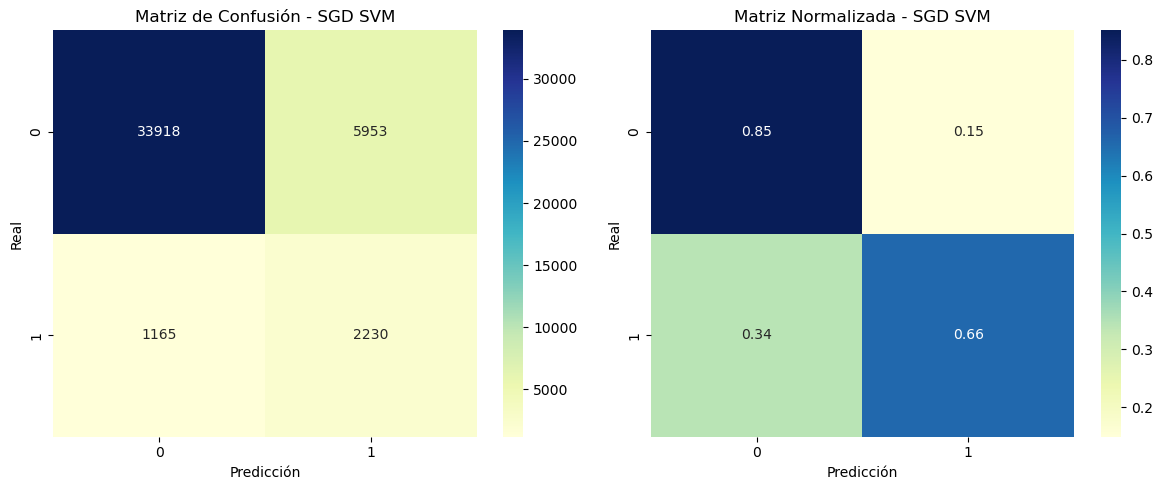

In [46]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Matrices de confusión ===
cm = confusion_matrix(y_test, y_pred)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

# === Visualización lado a lado ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Cruda
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', ax=axes[0])
axes[0].set_title("Matriz de Confusión - SGD SVM")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Normalizada
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[1])
axes[1].set_title("Matriz Normalizada - SGD SVM")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

plt.tight_layout()
plt.show()


AUC final sobre test: 0.8328


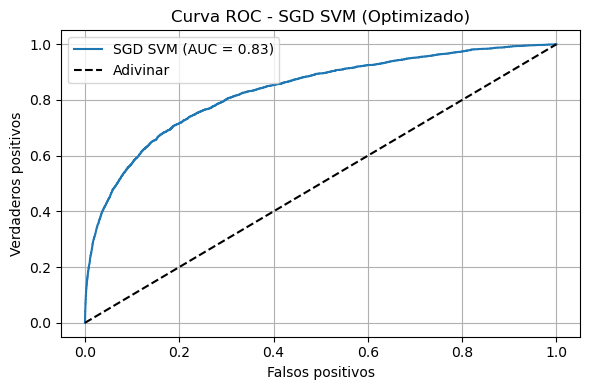

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# === Curva ROC ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC final sobre test: {auc_score:.4f}")

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'SGD SVM (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Adivinar')
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.title("Curva ROC - SGD SVM (Optimizado)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Guardar modelos base
joblib.dump(pipe_knn, "knn_model.pkl")
joblib.dump(grid_search_rf.best_estimator_, "rf_model.pkl")
joblib.dump(grid_search_xgb.best_estimator_, "xgb_model.pkl")
joblib.dump(best_ridge, "ridge_model.pkl")


['ridge_model.pkl']

### **Tabla — Métricas para la clase Fraude (1)**

| Modelo             | Precisión | Recall | Accuracy | F1-score | AUC    | Tiempo (s) |
|--------------------|-----------|--------|----------|----------|--------|------------|
| Naive Bayes        | 0.08      | 0.96   | 0.17     | 0.15     | 0.6176 | 0.27       |
| K-NN               | 0.36      | 0.72   | 0.88     | 0.48     | 0.8671 | 15.27      |
| Ridge (L2)         | 0.26      | 0.67   | 0.83     | 0.38     | 0.8321 | 45.69      |
| Lasso (L1)         | 0.26      | 0.67   | 0.83     | 0.38     | 0.8321 | 123.86     |
| Random Forest      | 0.84      | 0.56   | 0.96     | 0.67     | 0.9329 | 1516.32    |
| XGBoost            | 0.88      | 0.66   | 0.97     | 0.76     | 0.9620 | 491.73     |
| SVM (SGDClassifier)| 0.27      | 0.66   | 0.84     | 0.39     | 0.8328 | 15.71      |


### **Tabla B — Métricas para la clase No Fraude (0)**

| Modelo              | Precisión | Recall | Accuracy | F1-score | AUC    | Tiempo (s) |
|---------------------|-----------|--------|----------|----------|--------|------------|
| Naive Bayes         | 0.96      | 0.10   | 0.17     | 0.18     | 0.6176 | 0.27       |
| K-NN                | 0.97      | 0.89   | 0.88     | 0.93     | 0.8671 | 15.27      |
| Ridge (L2)          | 0.97      | 0.84   | 0.83     | 0.90     | 0.8321 | 45.69      |
| Lasso (L1)          | 0.97      | 0.84   | 0.83     | 0.90     | 0.8321 | 123.86     |
| Random Forest       | 0.96      | 0.99   | 0.96     | 0.98     | 0.9329 | 1516.32    |
| XGBoost             | 0.97      | 0.99   | 0.97     | 0.98     | 0.9620 | 491.73     |
| SVM (SGDClassifier) | 0.97      | 0.85   | 0.84     | 0.91     | 0.8328 | 15.71      |
